# OpenCV Min, Max, Min-Max-Loc

Documentation:

https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html?#min

## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Min, Max - 1

In [2]:
np.random.seed = 11
b = np.random.randint(0,256,(3,3))
b

array([[201, 130, 144],
       [ 18, 148, 172],
       [ 88, 109, 249]])

In [3]:
cv2.min(b,100)

array([[100, 100, 100],
       [ 18, 100, 100],
       [ 88, 100, 100]], dtype=int32)

In [4]:
cv2.max(b,100)

array([[201, 130, 144],
       [100, 148, 172],
       [100, 109, 249]], dtype=int32)

In [5]:
np.min(b)

18

In [6]:
np.max(b)

249

## Min, Max - 2

In [7]:
np.random.seed = 22
a1 = np.random.randint(0,2,(3,3))
a1

array([[0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]])

In [8]:
a2 = np.copy(a1)

In [9]:
a2 = a2 + 1
a2[a2 > 1]=0
a2

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [10]:
a1 + a2

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [11]:
cv2.min(a1,a2)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [12]:
cv2.max(a1,a2)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [13]:
np.minimum(a1,a2)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [14]:
np.maximum(a1,a2)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

## Min Max Loc

In [15]:
np.random.seed = 33
c = np.random.randint(0,256,(2,5))
c

array([[127, 206, 243, 206, 125],
       [  8, 147, 178,  51, 230]])

In [16]:
cv2.minMaxLoc(c)

(8.0, 243.0, (0, 1), (2, 0))

In [17]:
np.argmin(c)

5

In [18]:
np.argmax(c) #note: array flattened, position provided

2

In [19]:
np.ravel(c)

array([127, 206, 243, 206, 125,   8, 147, 178,  51, 230])

In [20]:
np.max(c)

243

In [21]:
np.where(c == np.max(c))

(array([0], dtype=int64), array([2], dtype=int64))

## Image

SOURCE: https://unsplash.com/photos/MZVTalo8VcM

In [22]:
img = cv2.imread('wolf2.jpg')

In [23]:
img.shape

(427, 640, 3)

In [24]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

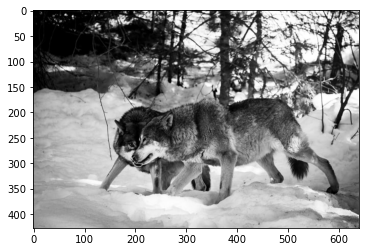

In [25]:
plt.imshow(img)

In [26]:
img_gray = cv2.imread('wolf2.jpg',0)

In [27]:
img_gray.shape

(427, 640)

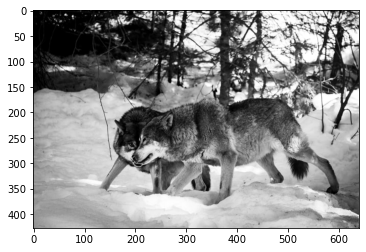

In [28]:
plt.imshow(img_gray,cmap='gray')

In [29]:
img_gray

array([[  0,   0,   0, ..., 237, 246, 248],
       [  0,   0,   0, ..., 255, 255, 233],
       [  0,   0,   0, ..., 201, 227, 241],
       ...,
       [144, 143, 145, ..., 111, 105,  92],
       [139, 138, 141, ..., 112,  95,  63],
       [133, 133, 136, ..., 111,  83,  28]], dtype=uint8)

In [30]:
cv2.minMaxLoc(img_gray)

(0.0, 255.0, (0, 0), (338, 0))

In [31]:
import seaborn as sns

C:\Users\sunde\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


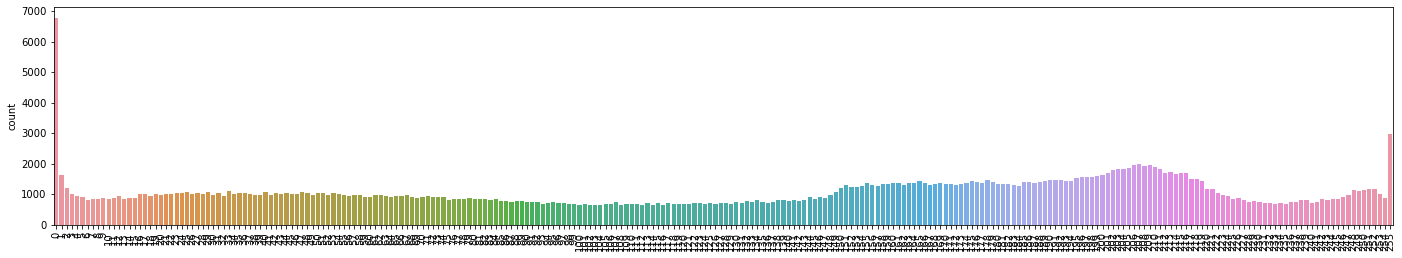

In [32]:
dims = (24, 4)
fig, ax = plt.subplots(figsize=dims)
chart = sns.countplot(np.ravel(img_gray))
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [33]:
uniqueValues, occurCount = np.unique(np.ravel(img_gray), return_counts=True)

In [34]:
uniqueValues[-1]

255

In [35]:
occurCount[-1]

2986

In [36]:
uniqueValues[0]

0

In [37]:
occurCount[0]

6788

# Image 2
Source: https://unsplash.com/photos/Xuf8FJwLZfE

In [38]:
img2 = cv2.imread('bubble_colors.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

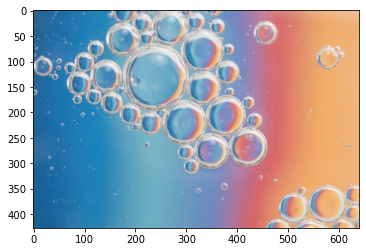

In [39]:
plt.imshow(img2)

In [40]:
img2.shape

(427, 640, 3)

In [41]:
cv2.minMaxLoc(img2)

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\minmax.cpp:765: error: (-215:Assertion failed) (cn == 1 && (_mask.empty() || _mask.type() == CV_8U)) || (cn > 1 && _mask.empty() && !minIdx && !maxIdx) in function 'cv::minMaxIdx'


In [42]:
img2_red = img2[:,:,0]

In [43]:
img2_red.shape

(427, 640)

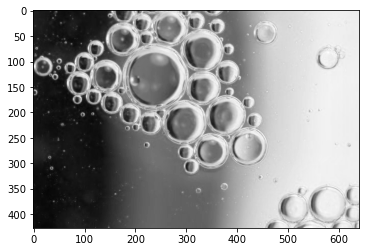

In [44]:
plt.imshow(img2_red,cmap='gray')

In [45]:
cv2.minMaxLoc(img2_red)

(13.0, 255.0, (32, 369), (308, 0))

In [46]:
img2_red2 = np.copy(img2)

In [47]:
img2_red2[:,:,1]=0
img2_red2[:,:,2]=0

In [48]:
img2_red2.shape

(427, 640, 3)

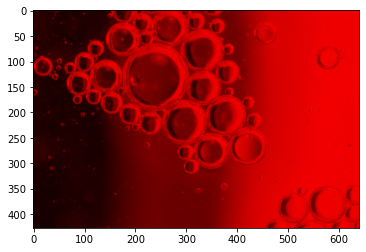

In [49]:
plt.imshow(img2_red2)

In [50]:
cv2.minMaxLoc(img2_red2)

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\minmax.cpp:765: error: (-215:Assertion failed) (cn == 1 && (_mask.empty() || _mask.type() == CV_8U)) || (cn > 1 && _mask.empty() && !minIdx && !maxIdx) in function 'cv::minMaxIdx'


# Image 3

Source: https://unsplash.com/photos/xQqhrScwpB4

In [51]:
img3 = cv2.imread('jagged_mountains.jpg')
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

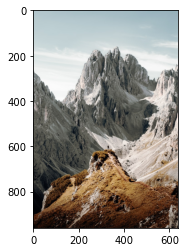

In [52]:
plt.imshow(img3)

In [53]:
img3.shape

(960, 640, 3)

In [54]:
img3_r = img3[:,:,0]
img3_g = img3[:,:,1]
img3_b = img3[:,:,2]

In [55]:
img_max = cv2.max(cv2.max(img3_r,img3_g),img3_b)

In [56]:
img3_r[img3_r<img_max] = 0
img3_b[img3_b<img_max] = 0
img3_g[img3_g<img_max] = 0

In [57]:
np.shape(img3_r)

(960, 640)

In [58]:
img3_v2 = [img3_r,img3_g,img3_b]

In [59]:
np.shape(img3_v2)

(3, 960, 640)

In [60]:
img3[0]

array([[  0,   0, 204],
       [  0,   0, 204],
       [  0,   0, 204],
       ...,
       [  0,   0, 187],
       [  0,   0, 187],
       [  0,   0, 187]], dtype=uint8)

In [61]:
print(img3[0])

[[  0   0 204]
 [  0   0 204]
 [  0   0 204]
 ...
 [  0   0 187]
 [  0   0 187]
 [  0   0 187]]


In [62]:
img3[0].shape

(640, 3)

In [63]:
len(np.ravel(img3_r))

614400

In [64]:
img3.shape

(960, 640, 3)

In [65]:
img4 = np.zeros((img3.shape))

In [66]:
img4.shape

(960, 640, 3)

In [67]:
ii = img3.shape[0]
jj = img3.shape[1]

In [68]:
for i in range(ii):
    for j in range(jj):
        img4[i,j,0] = img3_r[i,j]
        img4[i,j,1] = img3_g[i,j]
        img4[i,j,2] = img3_b[i,j]

In [69]:
np.unique(img4)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [70]:
img4 = img4.astype(int)

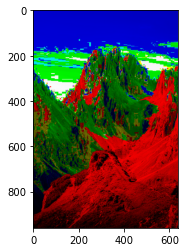

In [71]:
plt.imshow(img4)

In [72]:
img5 = cv2.merge([img3_r,img3_g,img3_b]);

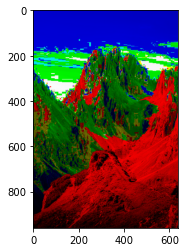

In [73]:
plt.imshow(img5)

Text(0.5, 1.0, 'post')

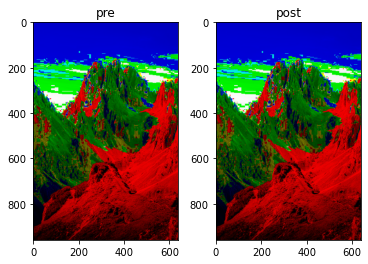

In [74]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(img3)
axs[0].set_title('pre')
axs[1].imshow(img4)
axs[1].set_title('post')